In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob


apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

# Display dataset overview
print("Apps Dataset:")
print(apps_df.head())
print("\nUser Reviews Dataset:")
print(reviews_df.head())

Apps Dataset:
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;P

In [8]:
# Step 2: Data Preparation
# Check for missing values
print("\nMissing Values in Apps Dataset:")
print(apps_df.isnull().sum())

print("\nMissing Values in User Reviews Dataset:")
print(reviews_df.isnull().sum())

# Drop duplicates and handle missing values
apps_df.drop_duplicates(inplace=True)
apps_df.fillna({'Rating': apps_df['Rating'].median()}, inplace=True)  # Example for filling missing ratings
reviews_df.dropna(subset=['Translated_Review'], inplace=True)


Missing Values in Apps Dataset:
Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Missing Values in User Reviews Dataset:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


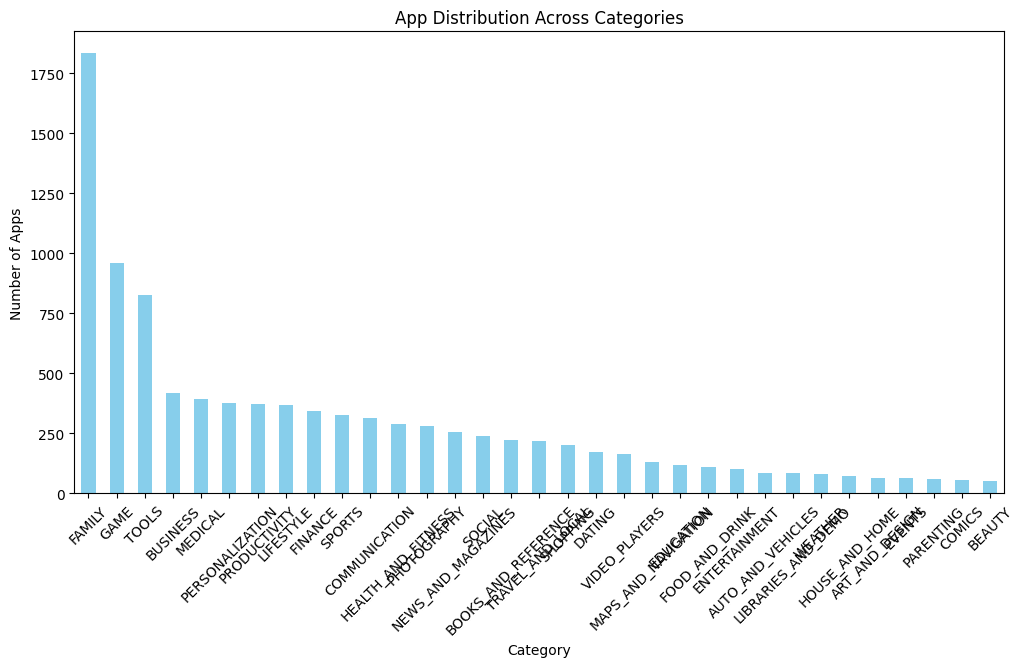

In [9]:
# Step 3: Category Exploration
# Distribution of apps across categories
plt.figure(figsize=(12, 6))
apps_df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

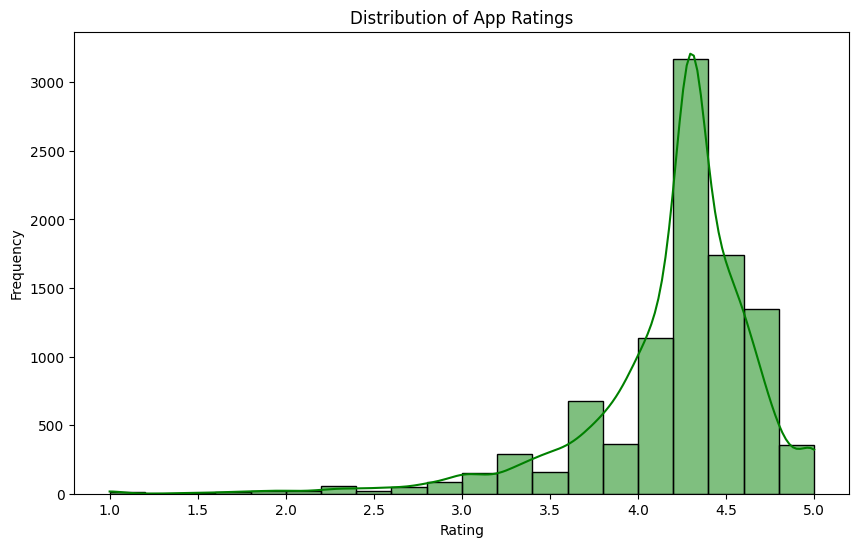

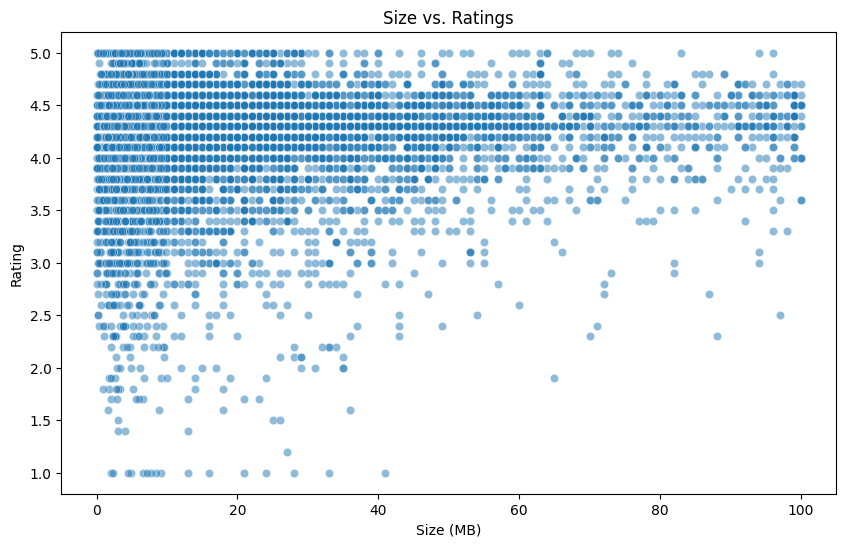

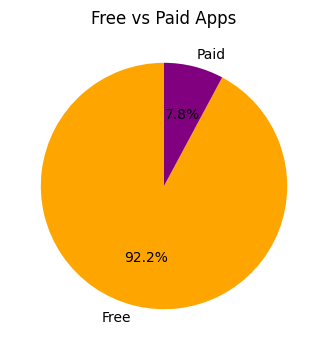

In [10]:
# Step 4: Metrics Analysis
# Ratings analysis
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], bins=20, kde=True, color='green')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Size vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=apps_df, alpha=0.5)
plt.title('Size vs. Ratings')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

# Pricing trends
free_vs_paid = apps_df['Type'].value_counts()
plt.figure(figsize=(6, 4))
free_vs_paid.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'purple'], startangle=90)
plt.title('Free vs Paid Apps')
plt.ylabel('')
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22900\2264861221.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=reviews_df, palette='viridis')


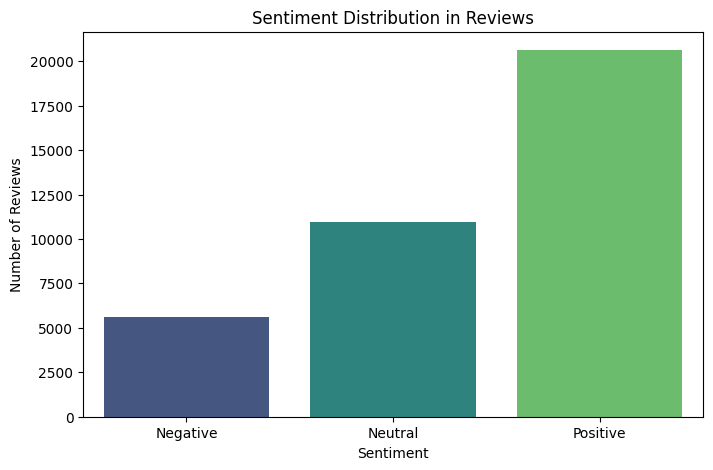

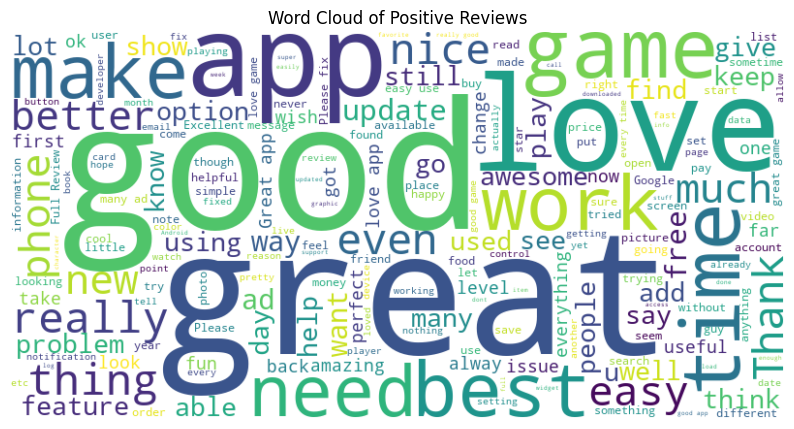

In [11]:
# Step 5: Sentiment Analysis
# Add a sentiment polarity score to the reviews dataset
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

reviews_df['Sentiment_Score'] = reviews_df['Translated_Review'].apply(get_sentiment)
reviews_df['Sentiment'] = pd.cut(reviews_df['Sentiment_Score'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=reviews_df, palette='viridis')
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Word Cloud for Positive Reviews
positive_reviews = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Positive']['Translated_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

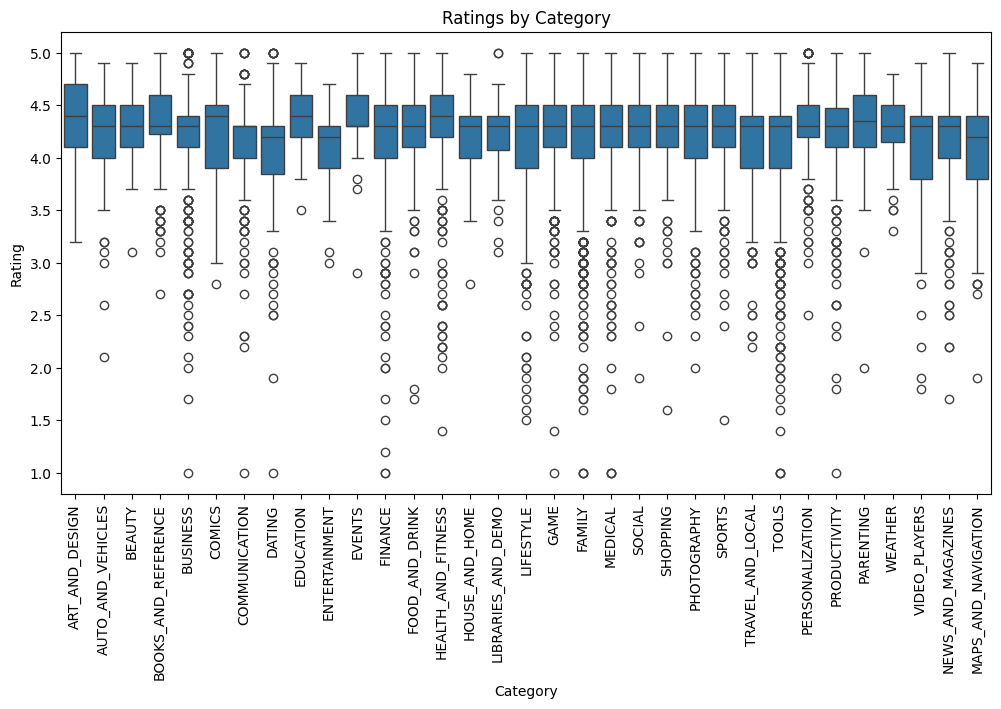


Recommendations:
1. Focus on top-rated categories to improve app development efforts.
2. Address common negative feedback found in reviews.
3. Ensure optimal app size and competitive pricing strategies.


In [12]:
# Step 6: Interactive Visualization (e.g., Category-Rating Distribution)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=apps_df)
plt.title('Ratings by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

# Recommendations
print("\nRecommendations:")
print("1. Focus on top-rated categories to improve app development efforts.")
print("2. Address common negative feedback found in reviews.")
print("3. Ensure optimal app size and competitive pricing strategies.")